# Проект: Моделирование теплопередачи

## Уравнение теплопередачи

Уравнение теплопередачи в одномерной форме можно записать как:

$$
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
$$

где:
- $ T $ — температура,
- $ \alpha $ — коэффициент теплопередачи,
- $ x $ — пространственная координата,
- $ t $ — время.

## Дискретизация

Мы будем использовать метод конечных разностей для дискретизации уравнения. Обозначим:
- $ T[i] $ — температура в узле \( i \),
- $ \Delta x $ — шаг по пространству,
- $ \Delta t $ — шаг по времени.

Обновление температуры в узле $ i $ на следующем временном шаге можно записать как:

$$
T[i]^{n+1} = T[i]^n + \frac{\alpha \Delta t}{(\Delta x)^2} (T[i+1]^n - 2T[i]^n + T[i-1]^n)
$$


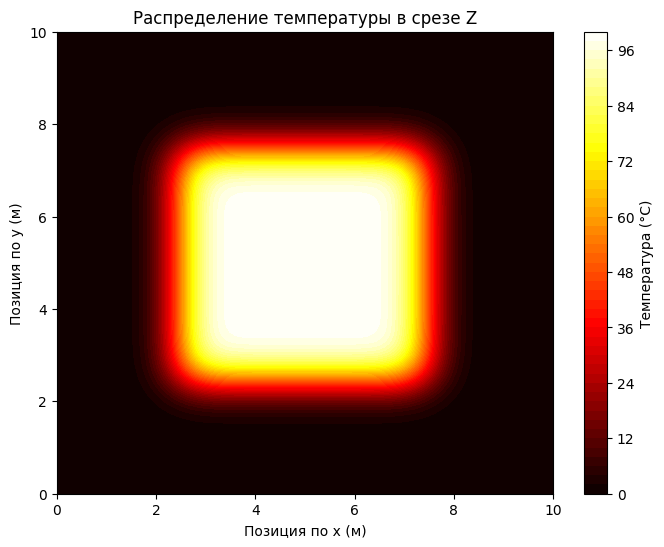

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import jit

# Параметры
Lx = 10.0          # Длина области по x
Ly = 10.0          # Длина области по y
Lz = 10.0          # Длина области по z
T_initial = 100.0  # Начальная температура
T_boundary = 0.0   # Температура на границах
alpha = 0.01       # Коэффициент теплопередачи
dx = 0.1           # Шаг по x
dy = 0.1           # Шаг по y
dz = 0.1           # Шаг по z
dt = 0.01          # Шаг по времени
time_steps = 1000  # Количество временных шагов

# Количество узлов
nx = int(Lx / dx) + 1
ny = int(Ly / dy) + 1
nz = int(Lz / dz) + 1

# Инициализация массива температур
T = np.zeros((nx, ny, nz))
T_new = np.zeros((nx, ny, nz))

# Установка начальных условий
T.fill(T_boundary)
T[nx//4:nx//4*3, ny//4:ny//4*3, nz//4:nz//4*3] = T_initial  # Начальная температура в центре

@jit(nopython=True)
def simulate_heat_transfer(T, T_new, alpha, dt, dx, dy, dz, time_steps):
    for n in range(time_steps):
        for i in range(1, len(T) - 1):
            for j in range(1, len(T[0]) - 1):
                for k in range(1, len(T[0][0]) - 1):
                    T_new[i, j, k] = T[i, j, k] + alpha * dt * (
                        (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) / dx**2 +
                        (T[i, j+1, k] - 2*T[i, j , k] + T[i, j-1, k]) / dy**2 +
                        (T[i, j, k+1] - 2*T[i, j, k] + T[i, j, k-1]) / dz**2
                    )
        
        # Обновление температуры
        T[:, :, :] = T_new[:, :, :]

# Запуск симуляции
simulate_heat_transfer(T, T_new, alpha, dt, dx, dy, dz, time_steps)

# Визуализация результатов
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(0, Lz, nz)
X, Y, Z = np.meshgrid(x, y, z)

# Визуализация среза по оси Z
slice_index = nz // 2
plt.figure(figsize=(8, 6))
plt.contourf(X[:, :, slice_index], Y[:, :, slice_index], T[:, :, slice_index].T, levels=50, cmap='hot')
plt.colorbar(label='Температура (°C)')
plt.title('Распределение температуры в срезе Z')
plt.xlabel('Позиция по x (м)')
plt.ylabel('Позиция по y (м)')
plt.show()

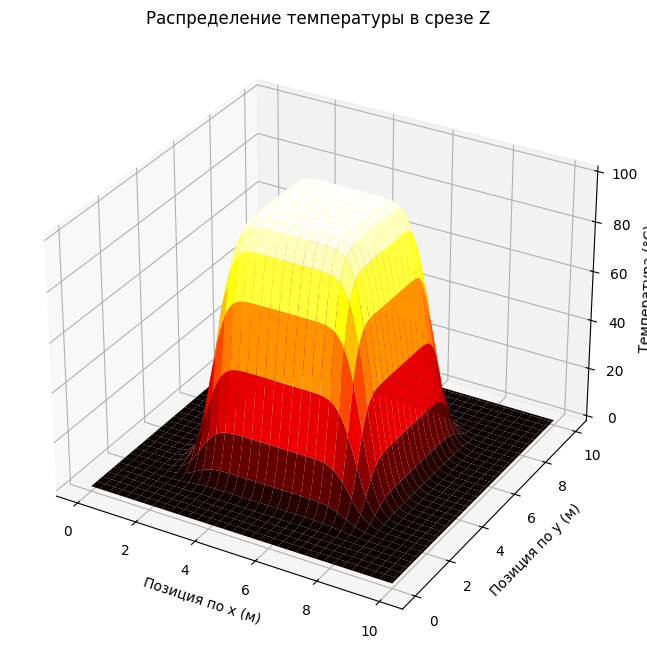

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import jit

# Параметры
Lx = 10.0          # Длина области по x
Ly = 10.0          # Длина области по y
Lz = 10.0          # Длина области по z
T_initial = 100.0  # Начальная температура
T_boundary = 0.0   # Температура на границах
alpha = 0.01       # Коэффициент теплопередачи
dx = 0.1           # Шаг по x
dy = 0.1           # Шаг по y
dz = 0.1           # Шаг по z
dt = 0.01          # Шаг по времени
time_steps = 1000  # Количество временных шагов

# Количество узлов
nx = int(Lx / dx) + 1
ny = int(Ly / dy) + 1
nz = int(Lz / dz) + 1

# Инициализация массива температур
T = np.zeros((nx, ny, nz))
T_new = np.zeros((nx, ny, nz))

# Установка начальных условий
T.fill(T_boundary)
T[nx//4:nx//4*3, ny//4:ny//4*3, nz//4:nz//4*3] = T_initial  # Начальная температура в центре

@jit(nopython=True)
def simulate_heat_transfer(T, T_new, alpha, dt, dx, dy, dz, time_steps):
    for n in range(time_steps):
        for i in range(1, len(T) - 1):
            for j in range(1, len(T[0]) - 1):
                for k in range(1, len(T[0][0]) - 1):
                    T_new[i, j, k] = T[i, j, k] + alpha * dt * (
                        (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) / dx**2 +
                        (T[i, j+1, k] - 2*T[i, j, k] + T[i, j-1, k]) / dy**2 +
                        (T[i, j, k+1] - 2*T[i, j, k] + T[i, j, k-1]) / dz**2
                    )
        
        # Обновление температуры
        T[:, :, :] = T_new[:, :, :]

# Запуск симуляции
simulate_heat_transfer(T, T_new, alpha, dt, dx, dy, dz, time_steps)

# Визуализация результатов
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(0, Lz, nz)
X, Y = np.meshgrid(x, y)

# Визуализация 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Выбор среза по оси Z
slice_index = nz // 2
ax.plot_surface(X, Y, T[:, :, slice_index].T, cmap='hot')

ax.set_title('Распределение температуры в срезе Z')
ax.set_xlabel('Позиция по x (м)')
ax.set_ylabel('Позиция по y (м)')
ax.set_zlabel('Температура (°C)')

plt.show()

# Решение уравнения теплопроводности в трехмерном пространстве методом конечных разностей

## Уравнение теплопроводности

Общее уравнение теплопроводности в трехмерном пространстве можно записать в следующем виде:

$$
c_v \frac{\partial T(\mathbf{x}, t)}{\partial t} = \nabla \cdot (\kappa \nabla T(\mathbf{x}, t)) + q_v(\mathbf{x}, t)
$$


где:
- \( T(\mathbf{x}, t) \) — температура в точке \( \mathbf{x} = (x, y, z)^T \) в момент времени \( t \).
- \( c_v \) — объемная теплоемкость.
- \( \kappa \) — коэффициент теплопроводности.
- \( q_v(\mathbf{x}, t) \) — объемная плотность источников тепла.
- \( \nabla \) — оператор градиента.

## Метод конечных разностей

### Дискретизация

Для решения уравнения с помощью метода конечных разностей мы сначала дискретизируем пространство и время. Обозначим шаги по пространству как \( \Delta x, \Delta y, \Delta z \) и шаг по времени как \( \Delta t \). Мы вводим сетку узлов:

$$
x_i = i \Delta x, \quad y_j = j \Delta y, \quad z_k = k \Delta z
$$


где \( i, j, k \) — индексы узлов.

### Применение схемы

Для нестационарного уравнения теплопроводности можно использовать явную или неявную схему. Рассмотрим явную схему:

1. **Явная схема**: Температура в следующем временном слое вычисляется на основе значений температуры в текущем слое:

$$
T^{n+1}_{i,j,k} = T^n_{i,j,k} + \frac{\Delta t}{c_v} \left( D_x T^n_{i+1,j,k} - 2D_x T^n_{i,j,k} + D_x T^n_{i-1,j,k} + D_y T^n_{i,j+1,k} - 2D_y T^n_{i,j,k} + D_y T^n_{i,j-1,k} + D_z T^n_{i,j,k+1} - 2D_z T^n_{i,j,k} + D_z T^n_{i,j,k-1} + q_v(\mathbf{x}, t) \Delta t\right)
$$


где \( D_x, D_y, D_z \) представляют собой дискретные производные по соответствующим направлениям.

### Граничные условия

При решении задачи необходимо задать граничные условия. Они могут быть:
- **Условия первого рода**: фиксированная температура на границе.
- **Условия второго рода**: фиксированный тепловой поток.

### Пример реализации

Реализация метода конечных разностей может выглядеть следующим образом:



# Теория теплопередачи

Теплопередача — это процесс, при котором тепло передается от одной части тела к другой или от одного тела к другому. Существует три основных механизма теплопередачи: проводимость, конвекция и излучение. В данном коде мы сосредоточены на **проводимости**, которая описывается уравнением теплопроводности.

## Уравнение теплопроводности

Уравнение теплопроводности в трехмерном пространстве можно записать как:

$$
\frac{\partial T}{\partial t} = \alpha \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2} \right)
$$

где:
- $ T $ — температура,
- $ t $ — время,
- $ \alpha $ — коэффициент теплопроводности,
- $ x, y, z $ — пространственные координаты.

## Дискретизация уравнения

Для численного решения уравнения теплопроводности мы используем метод конечных разностей. Мы заменяем производные на разностные выражения:

- Для временной производной:

$$
\frac{\partial T}{\partial t} \approx \frac{T^{n+1} - T^n}{\Delta t}
$$

- Для пространственных производных:

$$
\frac{\partial^2 T}{\partial x^2} \approx \frac{T_{i+1,j,k} - 2T_{i,j,k} + T_{i-1,j,k}}{\Delta x^2}
$$

Аналогично для \( y \) и \( z \).

## Обновление температуры

На каждом временном шаге мы обновляем значения температуры в каждой ячейке сетки, используя полученные разностные выражения. Это позволяет нам моделировать, как температура изменяется во времени и пространстве.

## Граничные условия

В коде мы устанавливаем граничные условия, задавая температуру на границах области. Это важно для корректного моделирования, так как граничные условия влияют на распределение температуры в области.

## Визуализация

После выполнения симуляции можно визуализировать результаты, чтобы увидеть, как температура распределяется в трехмерной области. Это помогает лучше понять процесс теплопередачи и его динамику.

Таким образом, код реализует численное решение уравнения теплопроводности с использованием метода конечных разностей, что позволяет исследовать поведение тепла в заданной области.

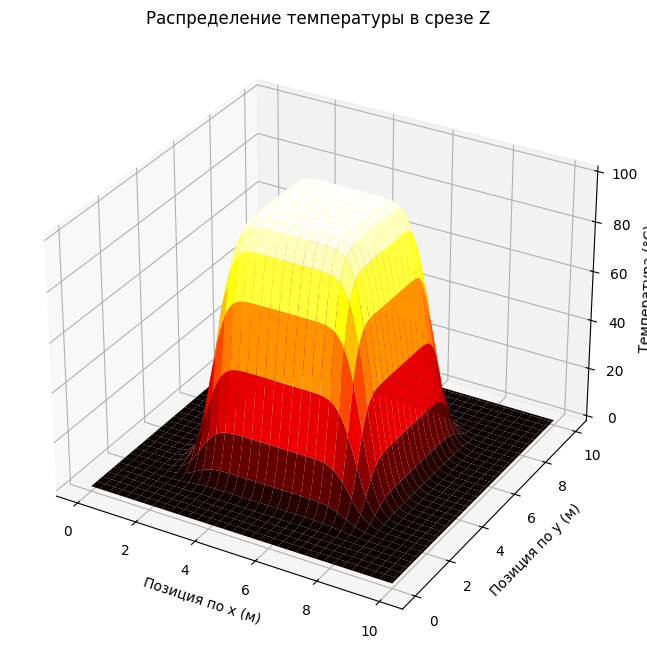

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
Lx = 10.0          # Длина области по x
Ly = 10.0          # Длина области по y
Lz = 10.0          # Длина области по z
T_initial = 100.0  # Начальная температура
T_boundary = 0.0   # Температура на границах
alpha = 0.01       # Коэффициент теплопередачи
dx = 0.1           # Шаг по x
dy = 0.1           # Шаг по y
dz = 0.1           # Шаг по z
dt = 0.01          # Шаг по времени
time_steps = 1000  # Максимальное количество временных шагов

# Количество узлов
nx = int(Lx / dx) + 1
ny = int(Ly / dy) + 1
nz = int(Lz / dz) + 1

# Инициализация массива температур
T = np.zeros((nx, ny, nz))
T_new = np.zeros_like(T)

# Установка начальных условий
T.fill(T_boundary)
T[nx//4:nx//4*3, ny//4:ny//4*3, nz//4:nz//4*3] = T_initial

def compute_temperature_change(T):
    """Вычисляет изменение температуры в каждой точке."""
    T_new = np.zeros_like(T)
    T_new[1:-1, 1:-1, 1:-1] = (
        T[1:-1, 1:-1, :-2] + T[1:-1, 1:-1, 2:] +
        T[1:-1, :-2, 1:-1] + T[1:-1, 2:, 1:-1] +
        T[:-2, 1:-1, 1:-1] + T[2:, 1:-1, 1:-1] -
        6 * T[1:-1, 1:-1, 1:-1]
    ) * (alpha * dt / (dx**2))
    return T_new

def simulate_heat_transfer(T, alpha, dt, time_steps):
    """Симуляция теплопередачи с использованием метода Розенброка."""
    for n in range(time_steps):
        T_change = compute_temperature_change(T)
        T_new[:] = T + T_change
        
        # Проверка на сходимость (если изменения незначительны)
        if np.max(np.abs(T_new - T)) < 0.01:
            break
        
        # Обновление температуры с учетом границ
        T[:, :, :] = T_new[:, :, :]

# Запуск симуляции
simulate_heat_transfer(T, alpha, dt, time_steps)

# Визуализация результатов
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(0, Lz, nz)
X, Y = np.meshgrid(x, y)

# Визуализация 3D графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Выбор среза по оси Z
slice_index = nz // 2
ax.plot_surface(X, Y, T[:, :, slice_index].T, cmap='hot')

ax.set_title('Распределение температуры в срезе Z')
ax.set_xlabel('Позиция по x (м)')
ax.set_ylabel('Позиция по y (м)')
ax.set_zlabel('Температура (°C)')

plt.show()


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

# Параметры задачи
L = 5.0          # Длина стороны куба
N = 100           # Количество узлов по каждой оси
alpha_initial = 0.01  # Начальный коэффициент теплопроводности
dt = 0.01        # Шаг по времени
T_max = 100        # Максимальное время

# Создание сетки
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
z = np.linspace(0, L, N)
X, Y, Z = np.meshgrid(x, y, z)

# Начальные условия: температура равномерно распределена
T_initial = np.zeros((N, N, N))
T_initial[N//2, N//2, N//2] = 100  # Начальная температура в центре

# Функция для обновления температуры
def update_temperature(T, alpha):
    T_new = T.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            for k in range(1, N-1):
                T_new[i, j, k] += alpha * dt * (
                    (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) +
                    (T[i, j+1, k] - 2*T[i, j, k] + T[i, j-1, k]) +
                    (T[i, j, k+1] - 2*T[i, j, k] + T[i, j, k-1]))
    return T_new

# Основной цикл по времени
T = T_initial
time_steps = int(T_max / dt)

# Список для хранения кадров анимации
frames = []

# Создание кадров для GIF
for t in range(time_steps):
    # Изменение коэффициента теплопроводности от времени
    alpha = alpha_initial * (1 + 0.5 * np.sin(np.pi * t * dt / T_max))  # Пример изменения alpha
    
    # Обновление температуры
    T = update_temperature(T, alpha)
    
    # Визуализация текущего состояния температуры
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scat = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=T.flatten(), cmap='hot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(f'Распределение температуры в кубе на шаге {t}')
    
    # Сохранение текущего кадра как изображения
    plt.colorbar(scat)
    plt.draw()
    
    # Сохранение изображения в массив кадров
    fig.canvas.draw() 
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    frames.append(image)
    
    plt.close(fig)  # Закрытие фигуры после сохранения

# Сохранение кадров как GIF
imageio.mimsave('temperature_distribution.gif', frames, fps=10)

print("GIF успешно создан и сохранен как 'temperature_distribution.gif'.")

C:\Users\saiap\AppData\Local\Temp\ipykernel_3100\3355290767.py:64: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


GIF успешно создан и сохранен как 'temperature_distribution.gif'.


In [48]:
from IPython.display import HTML
HTML('<img src="temperature_distribution.gif">')

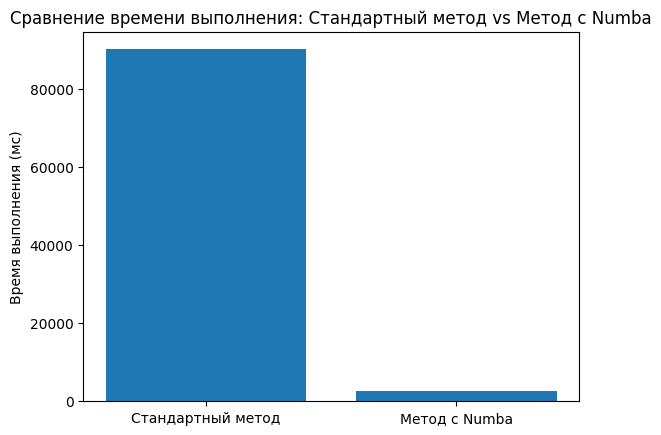

Время выполнения стандартного метода: 90.1331 секунд.
Время выполнения метода с Numba: 2.7458 секунд.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit, prange

L = 4.0          # Длина стороны куба
N = 100           # Количество узлов по каждой оси
alpha = 0.01     # Коэффициент теплопроводности
dt = 0.01        # Шаг по времени
T_max = 0.5      # Максимальное время


# Начальные условия: температура равномерно распределена
T_initial = np.zeros((N, N, N))
T_initial[N//2, N//2, N//2] = 100  # Начальная температура в центре

# Функция обновления температуры без Numba
def update_temperature_standard(T):
    T_new = T.copy()
    for i in range(1, T.shape[0]-1):
        for j in range(1, T.shape[1]-1):
            for k in range(1, T.shape[2]-1):
                T_new[i, j, k] += alpha * dt * (
                    (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) +
                    (T[i, j+1, k] - 2*T[i, j, k] + T[i, j-1, k]) +
                    (T[i, j, k+1] - 2*T[i, j, k] + T[i, j, k-1]))
                
    return T_new

# Функция обновления температуры с использованием Numba
@njit(parallel=True)
def update_temperature_numba(T):
    T_new = T.copy()
    for i in prange(1, T.shape[0]-1):
        for j in range(1, T.shape[1]-1):
            for k in range(1, T.shape[2]-1):
                T_new[i, j, k] += alpha * dt * (
                    (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) +
                    (T[i, j+1, k] - 2*T[i, j, k] + T[i, j-1, k]) +
                    (T[i, j, k+1] - 2*T[i, j, k] + T[i, j, k-1]))
                
    return T_new

# Измерение времени выполнения стандартного метода
start_time_standard = time.time()
T_standard = T_initial.copy()
for _ in range(int(T_max / dt)):
    T_standard = update_temperature_standard(T_standard)
elapsed_time_standard = time.time() - start_time_standard

# Измерение времени выполнения метода с Numba
start_time_numba = time.time()
T_numba = T_initial.copy()
for _ in range(int(T_max / dt)):
    T_numba = update_temperature_numba(T_numba)
elapsed_time_numba = time.time() - start_time_numba

# Визуализация результатов
labels = ['Стандартный метод', 'Метод с Numba']
times = [elapsed_time_standard * 1000, elapsed_time_numba * 1000]  # Время в миллисекундах

plt.bar(labels, times)
plt.ylabel('Время выполнения (мс)')
plt.title('Сравнение времени выполнения: Стандартный метод vs Метод с Numba')
plt.show()

print(f"Время выполнения стандартного метода: {elapsed_time_standard:.4f} секунд.")
print(f"Время выполнения метода с Numba: {elapsed_time_numba:.4f} секунд.")


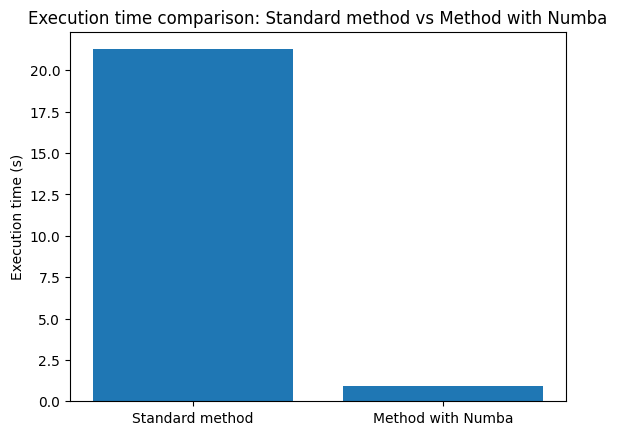

Время выполнения стандартного метода: 21.2730 секунд.
Время выполнения метода с Numba: 0.9186 секунд.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit, prange

# Параметры задачи
L = 10          # Длина стороны куба
N = 100           # Количество узлов по каждой оси
alpha = 0.1     # Коэффициент теплопроводности
dt = 0.5        # Шаг по времени
T_max = 10      # Максимальное время

# Начальные условия: температура равномерно распределена
T_initial = np.zeros((N, N, N))
T_initial[N//2, N//2, N//2] = 100  # Начальная температура в центре

# Функция обновления температуры без Numba
def update_temperature_standard(T):
    T_new = T.copy()
    for i in range(1, T.shape[0]-1):
        for j in range(1, T.shape[1]-1):
            for k in range(1, T.shape[2]-1):
                T_new[i, j, k] += alpha * dt * (
                    (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) +
                    (T[i, j+1, k] - 2*T[i, j, k] + T[i, j-1, k]) +
                    (T[i, j, k+1] - 2*T[i, j, k] + T[i, j, k-1]))
                
    return T_new

# Функция обновления температуры с использованием Numba
@njit(parallel=True)
def update_temperature_numba(T):
    T_new = T.copy()
    for i in prange(1, T.shape[0]-1):
        for j in range(1, T.shape[1]-1):
            for k in range(1, T.shape[2]-1):
                T_new[i, j, k] += alpha * dt * (
                    (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) +
                    (T[i, j+1, k] - 2*T[i, j, k] + T[i, j-1, k]) +
                    (T[i, j, k+1] - 2*T[i, j, k] + T[i, j, k-1]))
                
    return T_new

# Измерение времени выполнения стандартного метода
start_time_standard = time.time()
T_standard = T_initial.copy()
for _ in range(int(T_max / dt)):
    T_standard = update_temperature_standard(T_standard)
elapsed_time_standard = time.time() - start_time_standard

# Измерение времени выполнения метода с Numba
start_time_numba = time.time()
T_numba = T_initial.copy()
for _ in range(int(T_max / dt)):
    T_numba = update_temperature_numba(T_numba)
elapsed_time_numba = time.time() - start_time_numba

# Визуализация результатов
labels = ['Standard method', 'Method with Numba']
times = [elapsed_time_standard, elapsed_time_numba]  # Время в миллисекундах

plt.bar(labels, times)
plt.ylabel('Execution time (s)')
plt.title('Execution time comparison: Standard method vs Method with Numba')
plt.show()

print(f"Время выполнения стандартного метода: {elapsed_time_standard:.4f} секунд.")
print(f"Время выполнения метода с Numba: {elapsed_time_numba:.4f} секунд.")


### Only NUMBA

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from numba import njit
import time  # Importing the time module

# Параметры задачи
L = 10          # Длина стороны куба
N = 100         # Количество узлов по каждой оси
alpha_initial = 0.1  # Коэффициент теплопроводности
dt = 0.5        # Шаг по времени
T_max = 1       # Максимальное время

# Создание сетки
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
z = np.linspace(0, L, N)
X, Y, Z = np.meshgrid(x, y, z)

# Начальные условия: температура равномерно распределена
T_initial = np.zeros((N, N, N))
T_initial[N//2, N//2, N//2] = 100  # Начальная температура в центре

# Функция для обновления температуры с использованием Numba
@njit
def update_temperature(T, alpha):
    T_new = T.copy()
    for i in range(1, T.shape[0]-1):
        for j in range(1, T.shape[1]-1):
            for k in range(1, T.shape[2]-1):
                T_new[i, j, k] += alpha * dt * (
                    (T[i+1, j, k] - 2*T[i, j, k] + T[i-1, j, k]) +
                    (T[i, j+1, k] - 2*T[i, j, k] + T[i, j-1, k]) +
                    (T[i, j, k+1] - 2*T[i, j, k] + T[i, j, k-1]))
    return T_new

# Основной цикл по времени
start_time = time.time()  # Start timing the execution
T = T_initial
time_steps = int(T_max / dt)

# Список для хранения кадров анимации
frames = []

# Создание кадров для GIF
for t in range(time_steps):
    # Изменение коэффициента теплопроводности от времени
    alpha = alpha_initial * (1 + 0.5 * np.sin(np.pi * t * dt / T_max))  # Пример изменения alpha
    
    # Обновление температуры
    T = update_temperature(T, alpha)
    
    # Визуализация текущего состояния температуры
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scat = ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=T.flatten(), cmap='hot')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(f'Распределение температуры в кубе на шаге {t}')
    
    # Сохранение текущего кадра как изображения
    plt.colorbar(scat)
    plt.draw()
    
    # Сохранение изображения в массив кадров
    fig.canvas.draw() 
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    frames.append(image)
    
    plt.close(fig)  # Закрытие фигуры после сохранения

# Сохранение кадров как GIF
imageio.mimsave('temperature_distribution.gif', frames, fps=10)

end_time = time.time()  # End timing the execution
print(f"GIF успешно создан и сохранен как 'temperature_distribution.gif'.")
print(f"Время выполнения кода: {end_time - start_time:.2f} секунд.")  # Print the execution time


C:\Users\saiap\AppData\Local\Temp\ipykernel_9052\2328641222.py:68: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


GIF успешно создан и сохранен как 'temperature_distribution.gif'.
Время выполнения кода: 59.04 секунд.


In [9]:
from IPython.display import HTML
HTML('<img src="temperature_distribution.gif">')

### It is statistics from factorization py.files

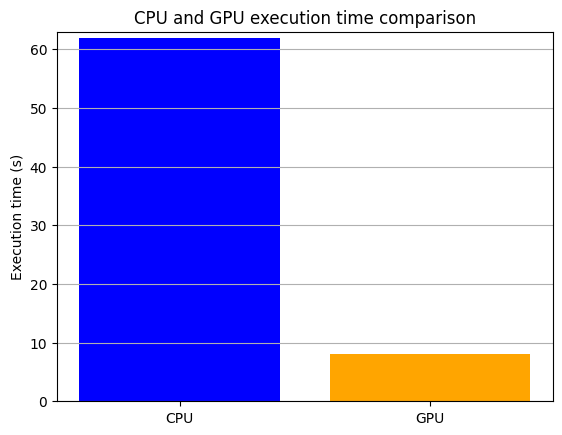

In [35]:
import torch
import time
import matplotlib.pyplot as plt

# Функция для выполнения вычислений
def compute_on_device(device, size=10**6):
    # Создаем случайный тензор
    data = torch.randn(size, device=device)
    
    # Выполняем некоторые вычисления (например, суммирование)
    start_time = time.time()
    result = data.sum()
    end_time = time.time()
    
    return end_time - start_time

# Установка устройства
device_cpu = 'cpu'
device_gpu = 'cuda' if torch.cuda.is_available() else 'cpu'

# Измерение времени выполнения на CPU
cpu_time = compute_on_device(device_cpu)

# Измерение времени выполнения на GPU (если доступно)
if device_gpu == 'cuda':
    gpu_time = compute_on_device(device_gpu)
else:
    gpu_time = None
cpu_time = 62
gpu_time = 8
# Данные для гистограммы
labels = ['CPU', 'GPU']
times = [cpu_time, gpu_time] if gpu_time is not None else [cpu_time]

# Построение гистограммы
plt.bar(labels, times, color=['blue', 'orange'])
plt.ylabel('Execution time (s)')
plt.title('CPU and GPU execution time comparison')
plt.ylim(0, max(times) + 1)  # Установка пределов по оси Y
plt.grid(axis='y')

# Показать гистограмму
plt.show()


Device is cpu


100%|██████████████████████████████████████████████████████████████████████████████| 1999/1999 [01:04<00:00, 30.98it/s]


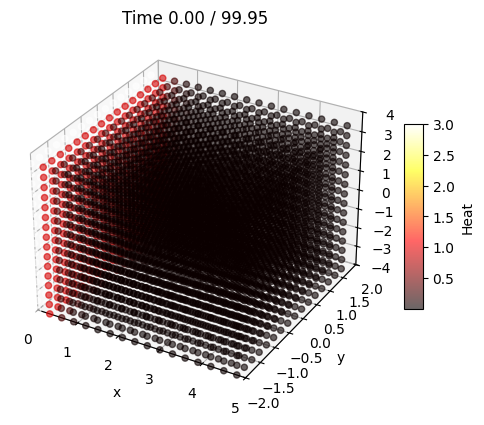

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

def main():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f'Device is {device}')
    task = HeatEquation(mu=mu, device=device)
    task.fit()

    # Create animation
    time_step = 1e-2
    #task.plot_animation_2d(time_step, slice_axis='z', slice_index=task.z_num//2)
    task.plot_animation_3d(time_step, resolution=15)

def mu(x, y, z):
    X, Y, Z = torch.meshgrid(x, y, z, indexing='ij')
    return 3*torch.exp(-4*X)

class HeatEquation():
    def __init__(self, 
                 mu,
                 x_left=0, x_right=5, step_x=0.1,
                 y_left=-2, y_right=2, step_y=0.05,
                 z_left=-4, z_right=4, step_z=0.05,
                 T=100, tau=0.05,
                 k=0.01,
                 device='cuda'
                 ):
        self.mu = mu
        self.x_left = x_left
        self.x_right = x_right
        self.step_x = step_x
        self.y_left = y_left
        self.y_right = y_right
        self.step_y = step_y
        self.z_left = z_left
        self.z_right = z_right
        self.step_z = step_z
        self.T = T 
        self.tau = tau
        self.k = k
        self.device = device

        # Set grids
        self.grid_x = torch.arange(self.x_left, self.x_right, self.step_x, dtype=torch.float32)
        self.grid_y = torch.arange(self.y_left, self.y_right, self.step_y, dtype=torch.float32)
        self.grid_z = torch.arange(self.z_left, self.z_right, self.step_z, dtype=torch.float32)
        self.grid_time = torch.arange(0, self.T, self.tau, dtype=torch.float32)

        # Set lenght of grids
        self.x_num = len(self.grid_x)
        self.y_num = len(self.grid_y)
        self.z_num = len(self.grid_z)
        self.time_num = len(self.grid_time)

        # Set initial conditions
        u_x_y_z = self.mu(self.grid_x, self.grid_y, self.grid_z)

        # Set boundary conditions
        # Boundary conditions for X
        u_0_y_z = self.mu(torch.tensor([self.x_left], dtype=torch.float32), self.grid_y, self.grid_z)
        u_a_y_z = self.mu(torch.tensor([self.x_right], dtype=torch.float32), self.grid_y, self.grid_z)
        # Boundary conditions for Y
        u_x_0_z = self.mu(self.grid_x, torch.tensor([self.y_left], dtype=torch.float32), self.grid_z)
        u_x_b_z = self.mu(self.grid_x, torch.tensor([self.y_right], dtype=torch.float32), self.grid_z)
        # Boundary conditions for Z
        u_x_y_0 = self.mu(self.grid_x, self.grid_y, torch.tensor([self.z_left], dtype=torch.float32))
        u_x_y_c = self.mu(self.grid_x, self.grid_y, torch.tensor([self.z_right], dtype=torch.float32))

        # Set U
        U = torch.zeros((self.time_num, self.x_num, self.y_num, self.z_num), dtype=torch.float32)

        # Initial condition
        U[0,:,:,:] = u_x_y_z
        # Boundary X
        U[:,0,:,:] = u_0_y_z.repeat((self.time_num,1,1))
        U[:,-1,:,:] = u_a_y_z.repeat((self.time_num,1,1))
        # Boundary Y
        U[:,:,0,:] = u_x_0_z.repeat((1,self.time_num,1)).permute(1,0,2)
        U[:,:,-1,:] = u_x_b_z.repeat((1,self.time_num,1)).permute(1,0,2)
        # Boundary Z
        U[:,:,:,0] = u_x_y_0.repeat((1,1,self.time_num)).permute(2,0,1)
        U[:,:,:,-1] = u_x_y_c.repeat((1,1,self.time_num)).permute(2,0,1)
        self.U = U.to(self.device)
    
    def tridiag_mat(self, n):
        '''Function for make tridiagonal matrix
        [[-1,1,0,0,0],
         [1,-2,1,0,0],
         [0,1,-2,1,0],
         [0,0,1,-2,1],
         [0,0,0,1,-1]]
        '''
        L = torch.diag(-2*torch.ones(n, device=self.device)) + torch.diag(torch.ones(n-1, device=self.device), 1) + torch.diag(torch.ones(n-1, device=self.device), -1)
        L[0, 0] = L[-1, -1] = -1
        return L
    
    def fit(self):
        Lx = self.tridiag_mat(self.x_num) * self.k/(self.step_x**2)
        Ly = self.tridiag_mat(self.y_num) * self.k/(self.step_y**2)
        Lz = self.tridiag_mat(self.z_num) * self.k/(self.step_z**2)
        
        Px = (torch.eye(self.x_num, device=self.device) - (self.tau/2)*Lx)
        Py = (torch.eye(self.y_num, device=self.device) - (self.tau/2)*Ly)
        Pz = (torch.eye(self.z_num, device=self.device) - (self.tau/2)*Lz)

        for t_i in tqdm(range(self.time_num-1)):
            LU = torch.einsum('ijk,il->ljk', self.U[t_i], Lx) +\
                 torch.einsum('ijk,jl->ilk', self.U[t_i], Ly) +\
                 torch.einsum('ijk,kl->ijl', self.U[t_i], Lz)

            w = torch.einsum('kl,ijk->ijl', torch.linalg.inv(Pz), LU)
            v = torch.einsum('jl,ijk->ilk', torch.linalg.inv(Py), w)
            du = torch.einsum('il,ijk->ljk', torch.linalg.inv(Px), v)

            self.U[t_i+1, 1:-1, 1:-1, 1:-1] = self.U[t_i, 1:-1, 1:-1, 1:-1] + self.tau*du[1:-1, 1:-1, 1:-1]
    
    def plot_animation_3d(self, time_step, resolution):
        '''Function create animation in 3d space with scatter plot
        params:
        :time_step (float): duration of pause between frames
        :resolution (int): number of points per axis, it should be ~10-15
        '''
        X, Y, Z = torch.meshgrid(self.grid_x, self.grid_y, self.grid_z, indexing='ij')

        points_x = self.x_num//resolution
        points_y= self.y_num//resolution
        points_z = self.z_num//resolution
        X = X[::points_x, ::points_y, ::points_z]
        Y = Y[::points_x, ::points_y, ::points_z]
        Z = Z[::points_x, ::points_y, ::points_z]
        U = self.U[:, ::points_x, ::points_y, ::points_z].cpu().numpy()

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        for i in range(0, self.grid_time.shape[0], self.grid_time.shape[0]//66):
            ax.clear()
            sc = ax.scatter(X, Y, Z, c=U[i], cmap='hot', alpha=0.6, vmin=self.U.min(), vmax=self.U.max())
            ax.set_title(f'Time {self.grid_time[i]:.2f} / {self.grid_time[-1]:.2f}')
            ax.set_xlim(self.x_left, self.x_right)
            ax.set_ylim(self.y_left, self.y_right)
            ax.set_zlim(self.z_left, self.z_right)
            ax.set_xlabel('x')
            ax.set_ylabel('y')
            ax.set_zlabel('z')
            ax.grid(True)

            if i == 0:
                cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=10)
                cbar.set_label('Heat')

            plt.pause(time_step)
        
        plt.show()

    def plot_animation_2d(self, time_step, slice_axis='z', slice_index=0):
        '''Function create animation of slice in 2d space
        params:
        :slice_axis (int or str): - axis where we create slice
        :slice_index (int): - index in array where we create slice
        '''
        if((slice_axis==0) or (slice_axis=='x')):
            actual_U = self.U[:,slice_index,:,:].cpu().numpy()
            extent=[self.y_left, self.y_right, self.z_left, self.z_right]
            xlabel = 'y'
            ylabel = 'z'
        elif((slice_axis==1) or (slice_axis=='y')):
            actual_U = self.U[:,:,slice_index,:].cpu().numpy()
            extent=[self.x_left, self.x_right, self.z_left, self.z_right]
            xlabel = 'x'
            ylabel = 'z'
        elif((slice_axis==2) or (slice_axis=='z')):
            actual_U = self.U[:,:,:,slice_index,].cpu().numpy()
            extent=[self.y_left, self.y_right, self.x_left, self.x_right]
            xlabel = 'y'
            ylabel = 'x'
        else:
            raise ValueError(f"There isn't slice_axis = {slice_axis}")

        plt.figure()
        for i in range(0, self.grid_time.shape[0], self.grid_time.shape[0]//66):
            plt.clf()
            plt.imshow(actual_U[i], origin="lower", extent=extent, cmap='hot', vmin=self.U.min(), vmax=self.U.max())
            plt.title(f'Time {self.grid_time[i]:.2f} / {self.grid_time[-1]:.2f}')
            plt.colorbar(label="Heat")
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.pause(time_step)
        
        plt.show()

if __name__=='__main__':
    main()

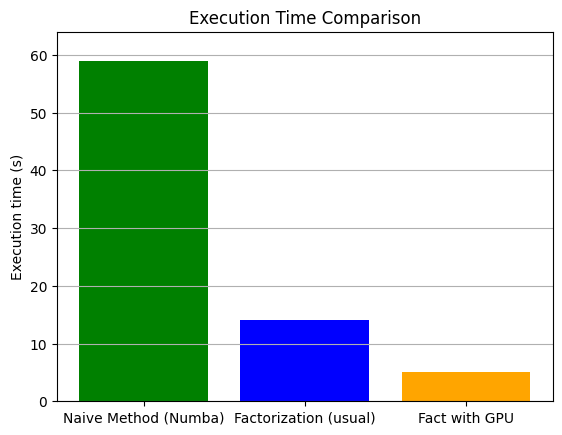

In [14]:
# Параметры задачи - для этих параметров
L = 10          # Длина стороны куба
N = 100         # Количество узлов по каждой оси
alpha_initial = 0.1  # Коэффициент теплопроводности
dt = 0.5        # Шаг по времени
T_max = 1       # Максимальное время

naive_method_time = 59  # Время выполнения наивного метода с Numba
ordinary_method_time = 14  # Время выполнения обычного метода
gpu_time = 5

# Данные для гистограммы
labels = ['Naive Method (Numba)', 'Factorization (usual)', 'Fact with GPU']
times = [naive_method_time, ordinary_method_time, gpu_time] if gpu_time is not None else [naive_method_time, ordinary_method_time]

# Построение гистограммы
plt.bar(labels, times, color=['green', 'blue', 'orange'])
plt.ylabel('Execution time (s)')
plt.title('Execution Time Comparison')
plt.ylim(0, max(times) + 5)  # Установка пределов по оси Y
plt.grid(axis='y')

# Показать гистограмму
plt.show()